In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./price_availability.csv', sep = ';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748696 entries, 0 to 4748695
Data columns (total 7 columns):
listing_id        int64
day               object
created           object
available         bool
local_currency    object
local_price       int64
min_nights        int64
dtypes: bool(1), int64(3), object(3)
memory usage: 167.6+ MB


In [4]:
df2 = pd.read_csv('./listings_final.csv', sep = ';')

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
Unnamed: 0                  1000 non-null int64
listing_id                  1000 non-null int64
name                        1000 non-null object
type                        1000 non-null object
city                        1000 non-null object
neighborhood                935 non-null object
latitude                    1000 non-null float64
longitude                   1000 non-null float64
person_capacity             1000 non-null int64
beds                        1000 non-null int64
bedrooms                    1000 non-null int64
bathrooms                   1000 non-null float64
is_rebookable               1000 non-null bool
is_new_listing              1000 non-null bool
is_fully_refundable         1000 non-null bool
is_host_highly_rated        1000 non-null bool
is_business_travel_ready    1000 non-null bool
pricing_weekly_factor       1000 non-null float64
pricing_monthly_factor  

In [6]:
df = df.groupby('listing_id').mean()
dfu = pd.merge(df, df2, on='listing_id')

In [7]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 22 columns):
listing_id                  999 non-null int64
available                   999 non-null float64
local_price                 999 non-null float64
min_nights                  999 non-null float64
Unnamed: 0                  999 non-null int64
name                        999 non-null object
type                        999 non-null object
city                        999 non-null object
neighborhood                934 non-null object
latitude                    999 non-null float64
longitude                   999 non-null float64
person_capacity             999 non-null int64
beds                        999 non-null int64
bedrooms                    999 non-null int64
bathrooms                   999 non-null float64
is_rebookable               999 non-null bool
is_new_listing              999 non-null bool
is_fully_refundable         999 non-null bool
is_host_highly_rated        999 non-

In [8]:
dfu.head()

,listing_id,available,local_price,min_nights,Unnamed: 0,name,type,city,neighborhood,latitude,...,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,56093,0.000000,170.000000,4.000000,12,Beau duplex dans le Marais,entire_home,Paris,3e arrondissement,48.867284,...,2,1,1.0,False,False,True,True,False,0.88,1.0
1,57207,0.482940,49.952756,2.000000,13,Belle Chambre pour court,private_room,Paris,Vaugirard,48.846184,...,1,1,1.0,False,False,True,False,False,0.87,1.0
2,114543,0.140260,107.374026,3.716883,19,Charming 1bdr 55m² - Eiffel Tower,entire_home,Paris,NaN,48.849530,...,1,1,1.0,False,False,True,True,False,0.90,0.9
3,149534,0.554974,169.000000,3.000000,9,GREAT WARM FULL APT LE HAUT MARAIS,entire_home,Paris,NaN,48.866360,...,2,1,1.0,False,False,True,True,False,1.00,0.4
4,164255,0.100580,75.876209,3.841393,28,Perfect place in Le Marais - Paris,entire_home,Paris,3e arrondissement,48.861398,...,2,1,1.0,False,False,True,False,False,1.00,1.0


In [9]:
#définir vos variables de travail X et Y
#Pour l'etude suivante on choisit les collonne suivante pour predire le prix : local_price , person_capacity , bathrooms
#ont a eliminer toutes les valeurs quaitatif car on veut une prediction quantitative, les collonne factor n'est pas pertinant, et les bed personne capacity et bedroom sont interessante mais redondante(il peuve etre cas d une nouvelle etude qui enclura ces collonne et les collonne choisit)


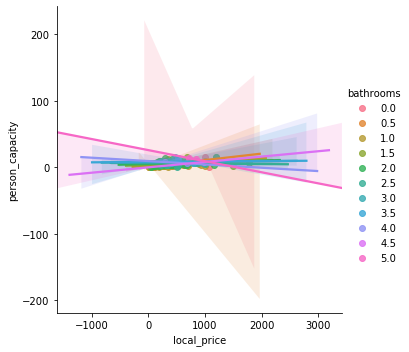

In [10]:
sb.lmplot(x='local_price',y='person_capacity',hue='bathrooms',data=dfu)

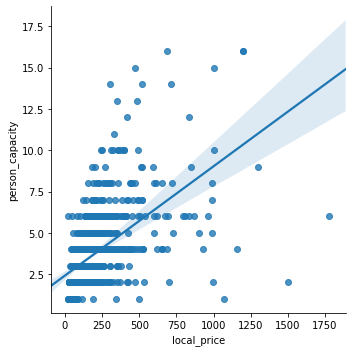

In [11]:
sb.lmplot(x='local_price',y='person_capacity',data=dfu)

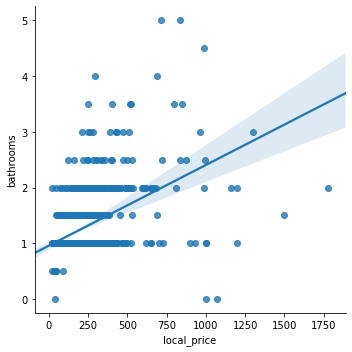

In [12]:
sb.lmplot(x='local_price',y='bathrooms',data=dfu)

In [13]:
X = np.array(dfu.local_price)
Y = np.array([dfu.person_capacity,dfu.bedrooms, dfu.bathrooms])
Y.shape




(3, 999)

In [14]:
X.shape


(999,)

In [15]:
Y.size

2997

In [16]:
X.size

999

In [34]:
Y = np.reshape(Y,(999,3))
X_train, X_test, Y_train, Y_test = train_test_split(Y,X, test_size=0.30, random_state=42)
Y_train.shape



(699,)

In [35]:
Y_test.shape

(300,)

In [36]:
X_train.shape

(699, 3)

In [37]:
X_test.shape

(300, 3)

In [45]:
lr = LinearRegression().fit(X_train,Y_train)

In [46]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
print("Coefficients beta_j :\n{0} \nCoefficients INTERCEPT beta_0 :\n {1}".format(lr.coef_,lr.intercept_))

Coefficients beta_j :
[ 0.05105275 -2.10531958 -4.05737923] 
Coefficients INTERCEPT beta_0 :
 197.2822629665012


In [48]:
#X_train = X_train.reshape(-1, 1)
#Y_train = Y_train.reshape(-1, 1)
lr.fit(X_train, Y_train)

#

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
Y_predict = lr.predict(X_test)

In [50]:
X_train.shape

(699, 3)

In [51]:
Y_train.shape

(699,)

In [52]:
Y_predict.size

300

In [56]:


print("Mean squared error: {0} \nR2: {1}\n".format(mean_squared_error(Y_test,Y_predict),r2_score(Y_test,Y_predict)))



Mean squared error: 35046.99302862562 
R2: -0.010380011409886869



In [ ]:
#𝑅2 est proche de 0, le modèle linéaire possède un faible pouvoir explicatif.

In [ ]:
#Mean squared error est loin de tendre vers 0 
#de ces 2 donnes on peutt conclure que notre proposition de correlation n'est pas la bonne ou 